# 1. Matplotlib API
[Matplotlib](https://matplotlib.org/stable/api/index.html) is a famous visualization library in Python, is the foundation for many other visualization libraries. Matplotlib along with NumPy can be considered equivalent to Matlab.

This topic focuses only on Pyplot - the most essential sub-module of Matplotlib and how to use it to build graphs of mathematical functions. For data visualization plots such as bar chart, histogram or pie chart, there are other libraries that do a better job than Matplotlib, and they will be discussed on later topics.

## 1.1. Plotting interfaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Object-oriented interface
Every plot created by Matplotlib is under the control of two objects,
<code style='font-size:13px;'><a href="https://matplotlib.org/stable/api/figure_api.html">figure</a></code>
and
<code style='font-size:13px;'><a href="https://matplotlib.org/stable/api/axes_api.html">axes</a></code>.
- An <code style='font-size:13px;'>figure</code> object is the whole image generated by Matplotlib, where everything is drawn on. It is a top-level object and works as a container for a number of <code style='font-size:13px;'>axes</code> objects.
- Each <code style='font-size:13px;'>axes</code> object usually refers to a 2-dimensional Cartesian coordinate system. It gives access to plot elements such as plots, labels, titles, text.

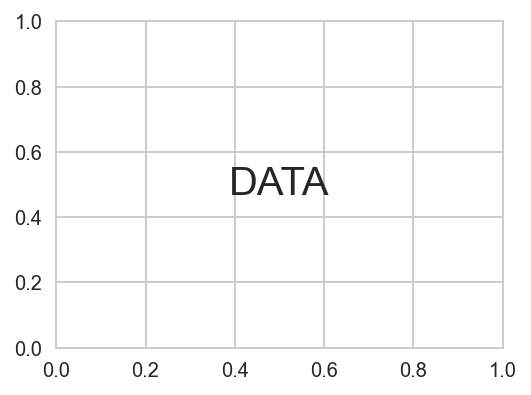

In [2]:
# create a figure
fig = plt.figure(figsize=(4,3))

# add an axes with some text
ax = fig.add_subplot()
ax.text(0.5, 0.5, 'DATA', ha='center', va='center', size=20)

plt.show()

Instead of creating <code style='font-size:13px;'>figure</code> and <code style='font-size:13px;'>axes</code> independently, Matplotlib provides a single function <code style='font-size:13px;'>subplots()</code> creates the two objects at once. This function is highly recommended in practice, and the introduction to the previous method is to clarify how <code style='font-size:13px;'>figure</code> and <code style='font-size:13px;'>axes</code> work and how they are related.

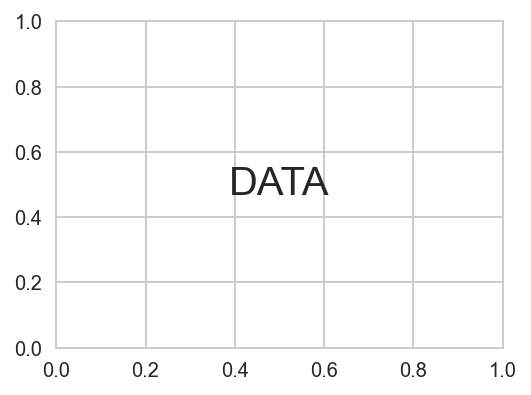

In [3]:
fig, ax = plt.subplots(figsize=(4,3))
ax.text(0.5, 0.5, 'DATA', ha='center', va='center', size=20)
plt.show()

When there are more than one *axes*, Matplotlib arranges them in a matrix of <code style='font-size:13px;'>axes</code> objects. Accessing each *axes* can be done using NumPy's array slicing.

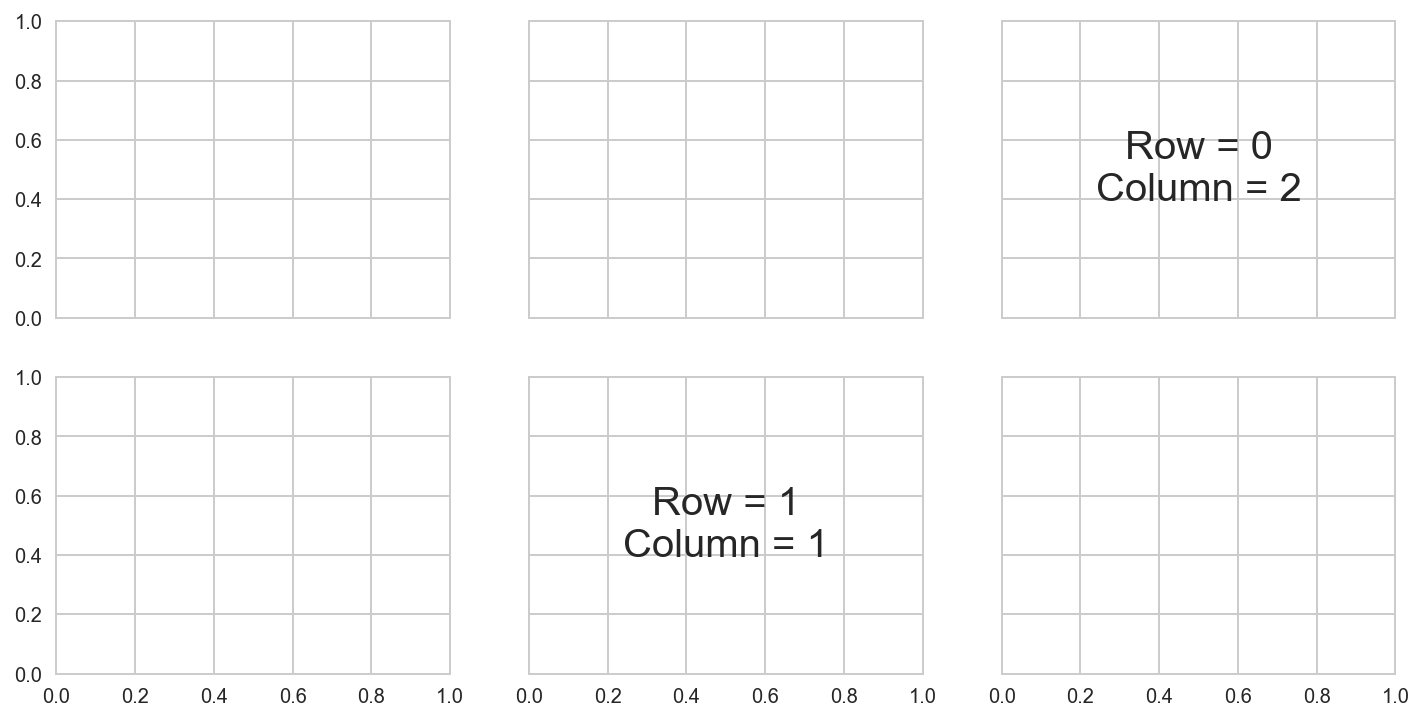

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6), sharex=True, sharey=True)
ax[0,2].text(0.5, 0.5, 'Row = 0\nColumn = 2', ha='center', va='center', size=20)
ax[1,1].text(0.5, 0.5, 'Row = 1\nColumn = 1', ha='center', va='center', size=20)
plt.show()

### State-machine interface
Besides the object-oriented interface, Matplotlib also provides another way that makes use of state-machine to create plots. When using this, the state-machine implicitly and automatically creates *figures* and *axes* to achieve the desired plot. Then a set of simple functions is used to add plot elements to the current *axes* in the current *figure*.

Compared to object-oriented, state-machine interface is a bit more convenient for making a single *axes*, but it is not recommended for arranging multiple *axes*. Overall, object-oriented interface is still the go-to method.

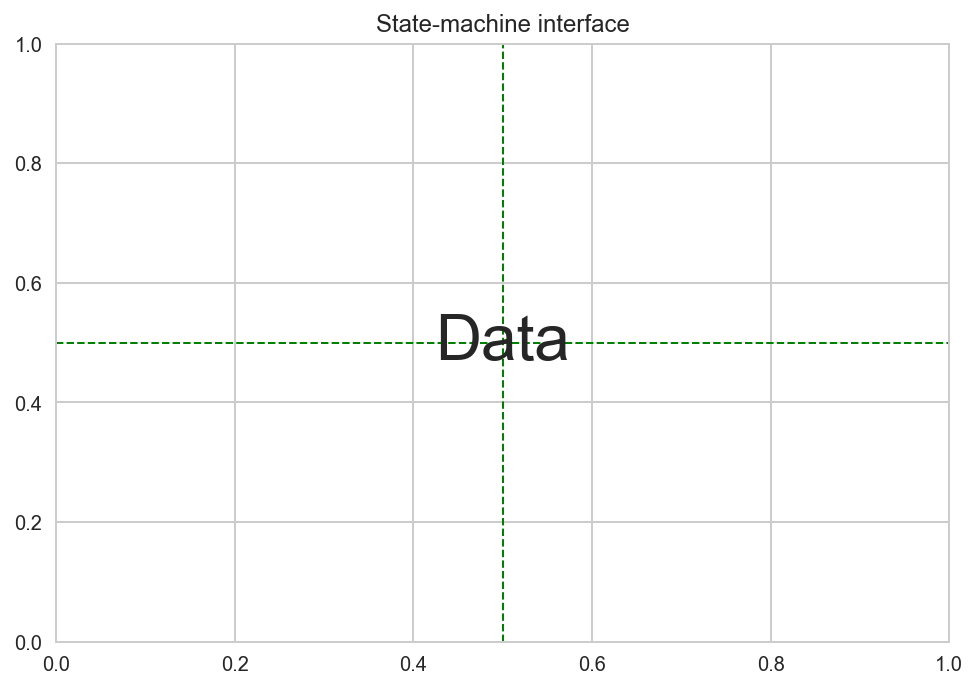

In [5]:
plt.text(0.5, 0.5, 'Data', ha='center', va='center', size=32)
plt.axvline(x=0.5, lw=1, color='g', linestyle='--')
plt.axhline(y=0.5, lw=1, color='g', linestyle='--')
plt.title('State-machine interface')
plt.show()

## 1.2. Controlling axes

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Equalizing axes
Graphs require the two axes to have the same scale.

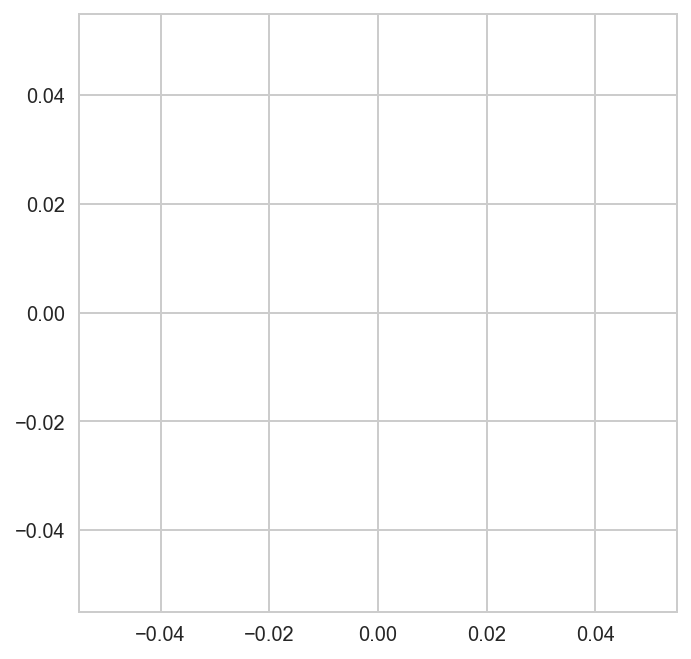

In [7]:
fig, ax = plt.subplots()

# make the two axes scaled
ax.axis('scaled')

# set tick frequencies of both axes to be 0.02
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))

plt.show()

### Axes limits

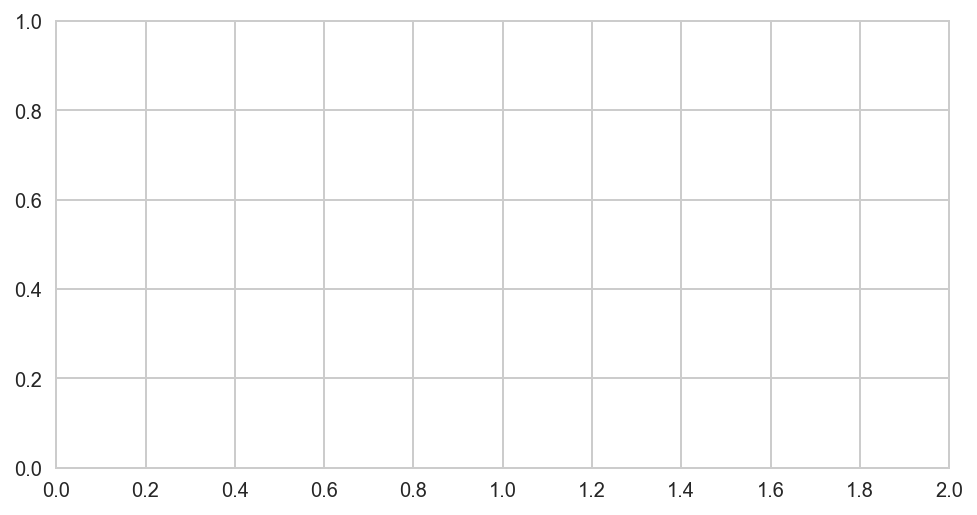

In [8]:
fig, ax = plt.subplots()
ax.axis('scaled')

# set limit for each axis
ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.show()

### Formatting axes

In [9]:
def axis_formatter(value, tick):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 2:
        return r"$\pi$"
    elif N == -2:
        return r'$-\pi$'
    elif N % 2 == 1 and N > 0:
        return fr"$\frac{{{N}}}{{2}}\pi$"
    elif N % 2 == 1 and N < 0:
        return fr"$-\frac{{{-N}}}{{2}}\pi$"
    else:
        return fr"${N//2}\pi$"

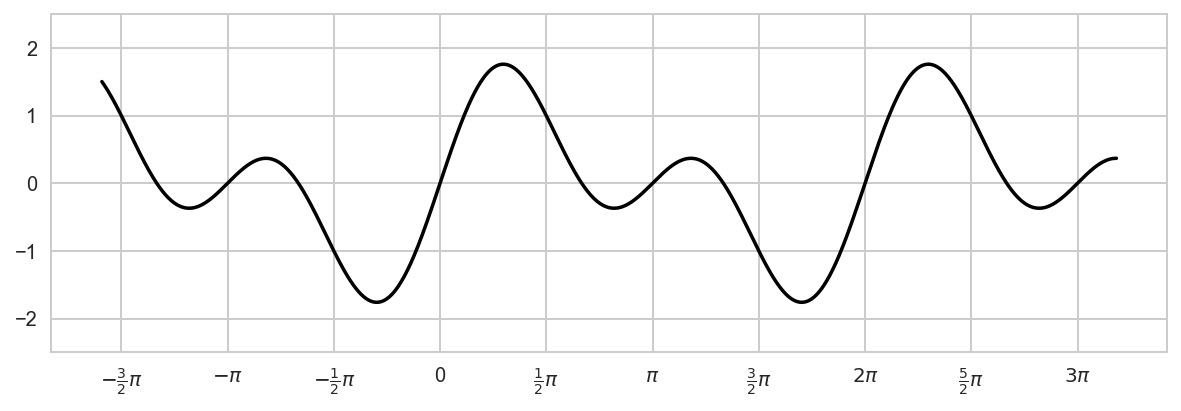

In [10]:
x = np.linspace(-5, 10, 1000)
y = np.sin(x) + np.sin(2*x)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, 'k')
ax.axis('scaled')

# set x-tick frequency to be pi/2 and apply a custom format strategy
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(axis_formatter))

ax.set_ylim(-2.5, 2.5)
plt.show()

## 1.3. Plotting

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Graphs
Matplotlib does not really have a way to make graphs, but this can be achieved indirectly by using the
<code style='font-size:13px;'><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html">axes.plot()</a></code>
method. The original functionality of this function is to plot a polyline connects data points.

It has an optional parameter, <code style='font-size:13px;'>fmt</code> that defines basic formatting following the syntax: <code style='font-size:13px;'>'{marker}{linestyle}{color}'</code>. The formatting string must not strictly follow the order in the syntax, but note that the parsing may be ambiguous. The table below summarizes some useful formatting strings:

|Parameter|Character|Meaning|
|:---|:---|:---|
|`marker`|`'.'`|point marker|
|`marker`|`'o'`|big point marker|
|`linestyle`|`'-'`|solid line style|
|`linestyle`|`'--'`|dashed line style|
|`linestyle`|`':'`|dotted line style|
|`linestyle`|`'-.'`|dash-dot line style|
|`color`|`'k'`|black|
|`color`|`'r'`|red|
|`color`|`'c'`|cyan|
|`color`|`'m'`|magenta|
|`color`|`'g'`|green|

With different combinations of formatting strings, <code style='font-size:13px;'>axes.plot()</code> can result in graphs (indirectly) and points (directly). In order to make graphs, the input for x-axis needs to be a dense set of values.

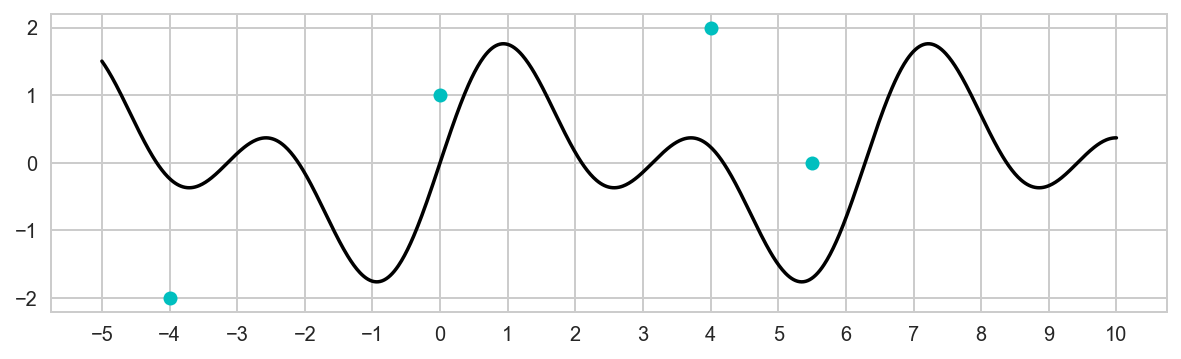

In [12]:
x1 = np.linspace(-5, 10, 1000)
y1 = np.sin(x1) + np.sin(2*x1)
x2 = np.array([0, 4, 5.5, -4])
y2 = np.array([1, 2, 0, -2])

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x1, y1, 'k')
ax.plot(x2, y2, 'oc')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

### Spans

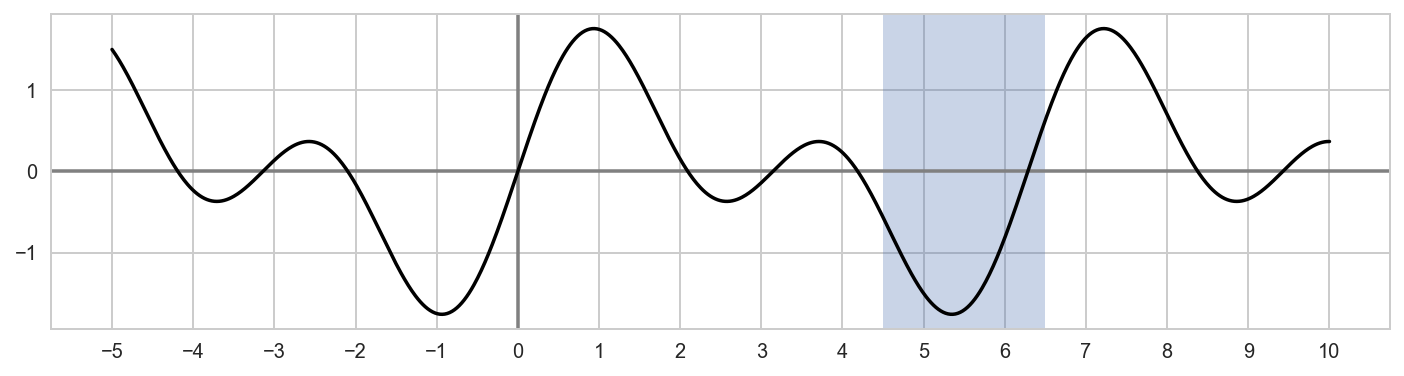

In [13]:
x = np.linspace(-5, 10, 1000)
y = np.sin(x) + np.sin(2*x)

fig, ax = plt.subplots(figsize=(12,4))

# add two lines represent the two axes
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')

# add a vertical span across y-axis
ax.axvspan(xmin=4.5, xmax=6.5, alpha=0.3)

ax.plot(x, y, 'k')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

### Vectors
The <code style="font-size:13px;"><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiver.html">axes.quiver()</a></code> method in Matplotlib allows plotting vectors. It has five important parameters, which must have the same length:
- <code style='font-size:13px;'>X</code> and <code style='font-size:13px;'>Y</code> locate the origins of vectors
- <code style='font-size:13px;'>U</code> and <code style='font-size:13px;'>V</code> define the vectors
- <code style='font-size:13px;'>color</code> sets vector colors

For some reasons, the parameters
<code style='font-size:13px;'>units='xy'</code>
and
<code style='font-size:13px;'>scale=1</code>
must always be set in order to draw vectors correctly.

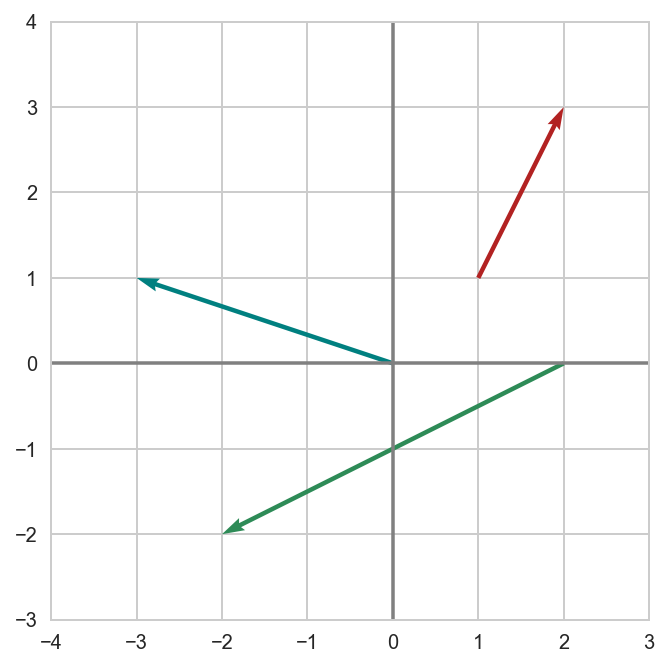

In [14]:
fig, ax = plt.subplots()
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.quiver(
    [1, 0, 2],
    [1, 0, 0],
    [1, -3, -4],
    [2, 1, -2],
    color=['firebrick', 'teal', 'seagreen'],
    units='xy',
    scale=1
)
ax.axis('scaled')
ax.set_xlim(-4,3)
ax.set_ylim(-3,4)
plt.show()

## 1.4. Annotations

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Text positioning
The
<code style='font-size:13px;'><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html">axes.text()</a></code>
method adds text to the axes at the location defined by two parameters,
<code style='font-size:13px;'>x</code> and <code style='font-size:13px;'>y</code>,
use true coordinate values by default. By setting
<code style='font-size:13px;'>transform=ax.transAxes</code> (highly recommended),
these two parameters are now on a *relative coordinates* where
<code style='font-size:13px;'>(0,0)</code> is the lower-left corner and <code style='font-size:13px;'>(1,1)</code> is the upper-right corner.

There is also a pair of parameters,
<code style='font-size:13px;'>ha</code> and <code style='font-size:13px;'>va</code> (*horizontal/vertical alignment*),
specify the relative position of the coordinates to the text box. Possible values for these parameters are
<code style='font-size:13px;'>left</code>
<code style='font-size:13px;'>right</code>
<code style='font-size:13px;'>center</code>
and
<code style='font-size:13px;'>top</code>
<code style='font-size:13px;'>bottom</code>
<code style='font-size:13px;'>center</code>, respectively.

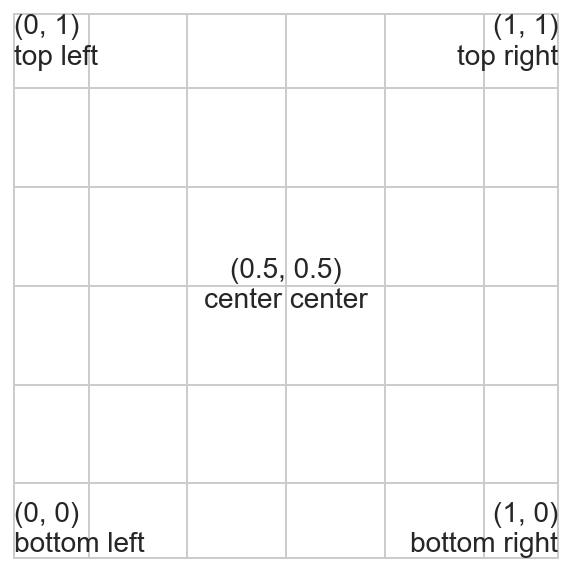

In [16]:
fig, ax = plt.subplots(figsize=(5,5))

ax.text(0.5, 0.5, '(0.5, 0.5)\ncenter center', va='center', ha='center', size=14, transform=ax.transAxes)
ax.text(0, 0, '(0, 0)\nbottom left', va='bottom', ha='left', size=14, transform=ax.transAxes)
ax.text(1, 1, '(1, 1)\ntop right', va='top', ha='right', size=14, transform=ax.transAxes)
ax.text(0, 1, '(0, 1)\ntop left', va='top', ha='left', size=14, transform=ax.transAxes)
ax.text(1, 0, '(1, 0)\nbottom right', va='bottom', ha='right', size=14, transform=ax.transAxes)

ax.axis('scaled')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

### Plot titles

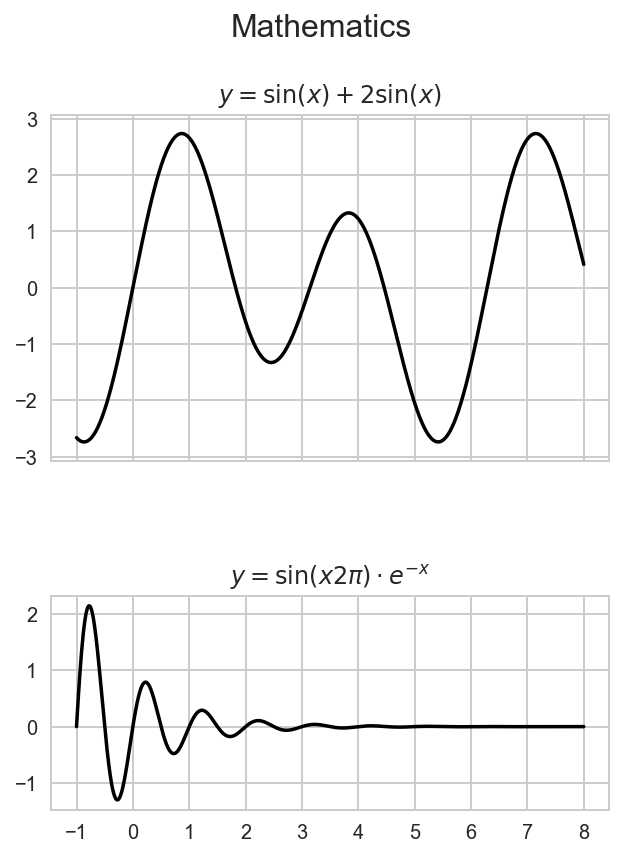

In [17]:
x = np.linspace(-1, 8, 1000)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(5,7))
fig.suptitle('Mathematics', fontsize=16)

ax[0].plot(x, np.sin(x)+2*np.sin(2*x), 'k')
ax[0].set_title('$y=\sin(x)+2\sin(x)$')
ax[0].axis('equal')
ax[0].xaxis.set_major_locator(plt.MultipleLocator(1))
ax[0].yaxis.set_major_locator(plt.MultipleLocator(1))

ax[1].plot(x, np.sin(x*2*np.pi)*np.exp(-x), 'k')
ax[1].set_title('$y=\sin(x2\pi)\cdot e^{-x}$')
ax[1].axis('scaled')
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
ax[1].yaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

### Axis labels

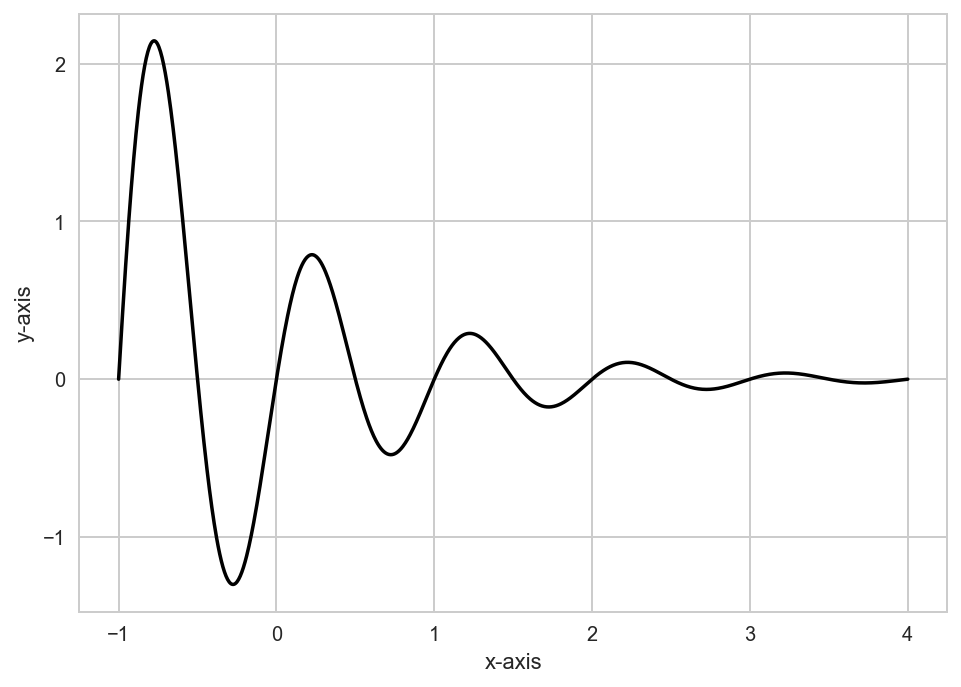

In [18]:
x = np.linspace(-1, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x*2*np.pi)*np.exp(-x), 'k')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

# set axis labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

plt.show()

### Legends
The <code style='font-size:13px;'><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html">axes.lengend()</a></code> method
takes a list of plot names, which is indexed the same as the number of <code style='font-size:13px;'>axes.plot()</code> methods called. It can also use the value of <code style='font-size:13px;'>label</code> parameter in each <code style='font-size:13px;'>axes.plot()</code> method to generate the legend.

By default, Matplotlib automatically determines the best location for the legend inside the plot. This can be changed using the parameter <code style='font-size:13px;'>loc</code>, which specifies locations using strings such as
<code style='font-size:13px;'>"lower center"</code> and <code style='font-size:13px;'>"upper right"</code>.
When there is no optimized location like in the example below, the legend should be placed outside of the axes.
This can be achieved using <code style='font-size:13px;'>bbox_to_anchor</code> alongside with <code style='font-size:13px;'>loc</code>; this pair of parameters behaves exactly the same as text positioning.

Another useful configuration is the `ncol` parameter. It specifies the number of columns in the grid of legend labels.

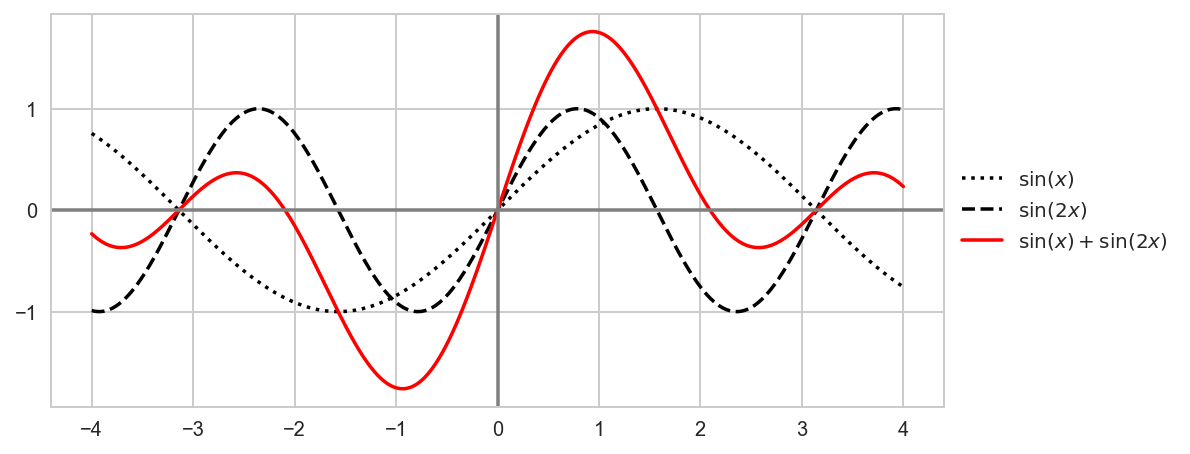

In [19]:
x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), ':k')
ax.plot(x, np.sin(2*x), '--k')
ax.plot(x, np.sin(x)+np.sin(2*x), 'r')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')

# pass the list of labels into the ax.legend method
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

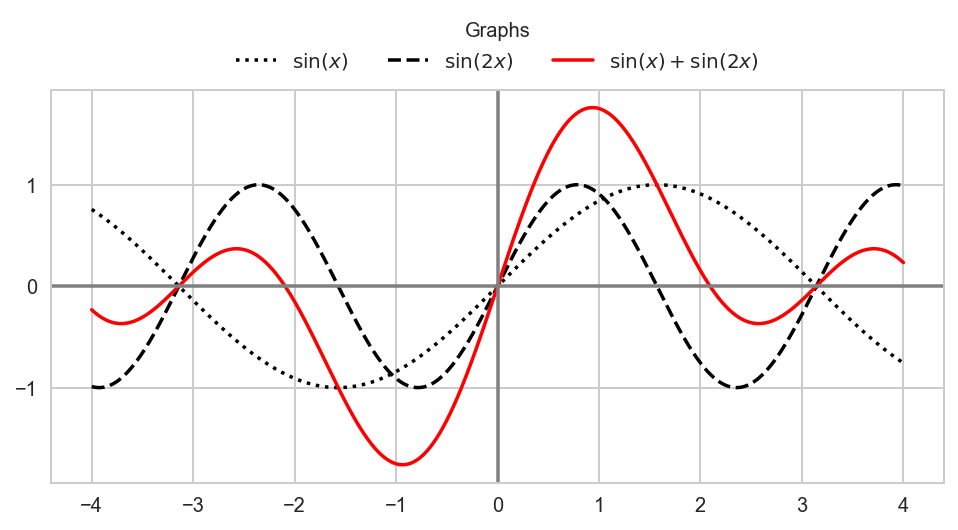

In [20]:
x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), ':k', label='$\sin(x)$')
ax.plot(x, np.sin(2*x), '--k', label='$\sin(2x)$')
ax.plot(x, np.sin(x)+np.sin(2*x), 'r', label='$\sin(x)+\sin(2x)$')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(bbox_to_anchor=(0.5, 1), loc='lower center', ncol=3, title='Graphs')

plt.show()

## 1.5. Themes and colors

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Themes
Matplotlib supports a variety of themes such as
<code style='font-size:13px;'>ggplot</code>
<code style='font-size:13px;'>seaborn</code>
<code style='font-size:13px;'>tableau-colorblind10</code>
inspired by other popular visualization tools. However, since drawing graphs requires a white background, then I usually use <code style='font-size:13px;'>seaborn-whitegrid</code>.

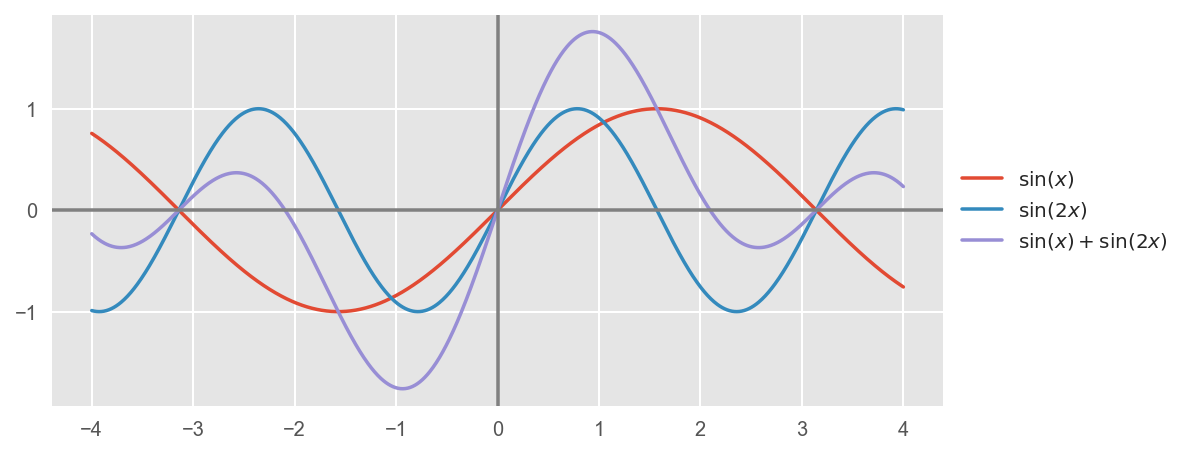

In [22]:
plt.style.use('ggplot')

x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(x)+np.sin(2*x))
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

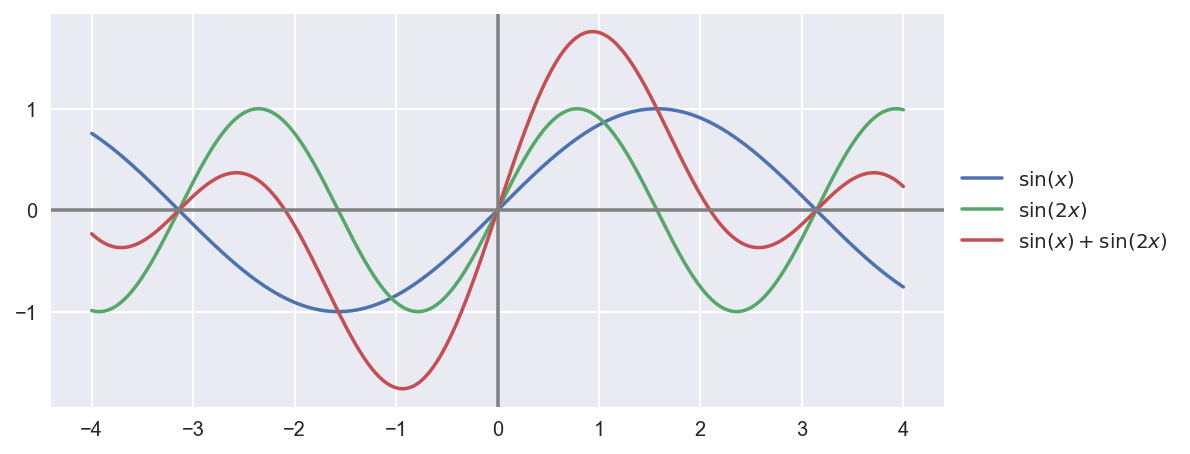

In [23]:
plt.style.use('seaborn')

x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(x)+np.sin(2*x))
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

### Built-in Matplotlib colors
Besides themes, Matplotlib also provides a collection of colors for better visualization. Some nice colors by CSS name are:
<code style='font-size:13px;'>dimgrey</code>
<code style='font-size:13px;'>indianred</code>
<code style='font-size:13px;'>tomato</code>
<code style='font-size:13px;'>goldenrod</code>
<code style='font-size:13px;'>seagreen</code>
<code style='font-size:13px;'>teal</code>
<code style='font-size:13px;'>darkturquoise</code>
<code style='font-size:13px;'>darkslategrey</code>
<code style='font-size:13px;'>slategrey</code>
<code style='font-size:13px;'>royalblue</code>
<code style='font-size:13px;'>rebeccapurple</code>.

<img src='image/matplotlib_color_names.png' style='height:700px; margin:20px auto;'>

# 2. Mathematical functions
In Mathematics, a [function](https://en.wikipedia.org/wiki/Function_(mathematics)) (usually denoted $f$) is a process of transforming each given *input* number (denoted $x$) to exactly one *output* number (denoted $y$). This process can be in the form of a mathematical formula or some logical rules and can be expressed using the notation:

$$y=f(x)$$

The set of inputs and the set of outputs are called the [domain](https://en.wikipedia.org/wiki/Domain_of_a_function) (denoted $X$) and [codomain](https://en.wikipedia.org/wiki/Codomain) (denoted $Y$), consecutively. The function in this context is written as $f\colon X\to Y$.

The set of all pairs $(x,y)$, formally denoted $G=\{(x,y)\mid x\in X\}$ is called the [graph](https://en.wikipedia.org/wiki/Graph_of_a_function) of the function. It popularly means the illustration of the function with the condition $x,y\in\mathbb{R}$.

Another related concept to function is [map](https://en.wikipedia.org/wiki/Map_(mathematics)), which is often used as a synonym of function. However, from now on in this series about Data Science, map refers to a generalization of function, which extends the scope of $x$ and $y$ not to be restricted to numbers only, but can also be other data-like objects such as strings and datetime. In reality, the more common meaning of the word map, Google Maps, for example, is actually made by mapping the Earth's surface to a sheet of paper. The notation for map is:

$$f\colon x\mapsto y$$

## 2.1. Elementary functions

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Polynomial functions
A [polynomial](https://en.wikipedia.org/wiki/Polynomial) is a function having the following form:

$$y=a_nx^n+a_{n-1}x^{n-1}+a_{n-2}x^{n-2}+\dots+a_1x+a_0$$

where:
- $n\;(n\in\mathbb{N})$ is the [degree](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) of the polynomial
- $n,n-1,n-2,\dots,0$ are the degrees of the corresponding [monomial](https://en.wikipedia.org/wiki/Monomial)
- $a_n,a_{n-1},\dots,a_0\;(a_n\neq0)$ are the coefficients

Each polynomial has the domain of $x\in\mathbb{R}$ and the codomain of $y\in\mathbb{R}$. It has a maximum of $n$ solutions and a maximum of $n-1$ extrema.

Some popular polynomials are:
- $f(x)=ax+b$, [linear functions](https://en.wikipedia.org/wiki/Linear_function)
- $f(x)=ax^2+bx+c$, [quadratic functions](https://en.wikipedia.org/wiki/Quadratic_equation), which has the parabola shape

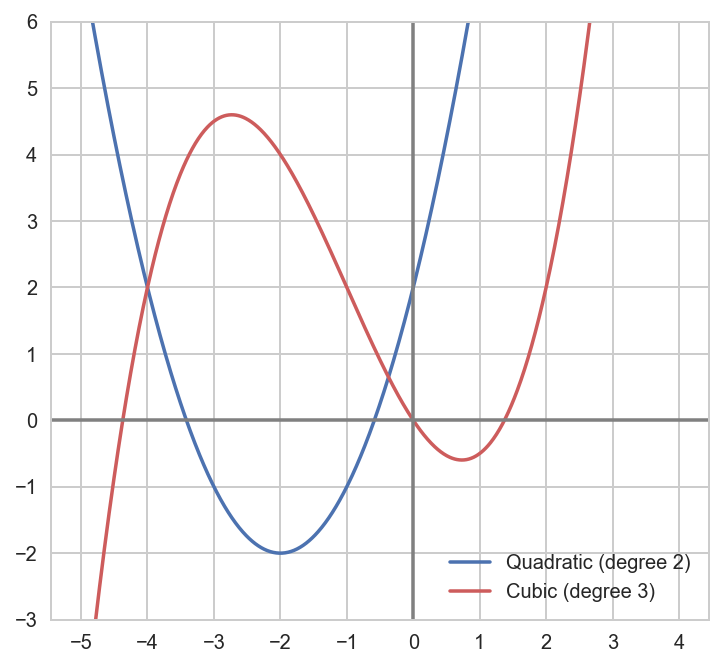

In [25]:
x = np.linspace(-5, 4, 1000)
y1 = x**2 + 4*x + 2
y2 = 1/4*x**3 + 3/4*x**2 - 3/2*x

fig, ax = plt.subplots()
ax.plot(x, y1, label='Quadratic (degree 2)')
ax.plot(x, y2, label='Cubic (degree 3)', c='indianred')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_ylim(-3, 6)
ax.legend()
plt.show()

### Exponential functions
An [exponential function](https://en.wikipedia.org/wiki/Exponential_function) is a function having $x$ in its power. The form of the function is:

$$y=b^x$$

where $b\;(b>0)$ is the base.

Exponential functions have the domain of $x\in\mathbb{R}$ and the codomain of $y\in(0,+\infty)$. Exponential functions are [monotonic](https://en.wikipedia.org/wiki/Monotonic_function), and can be either increasing or decreasing as the value of $b$ changes. All exponential functions go through the point $(0,1)$, since $b^0=1$ for any value of $b$.

Some popular exponential functions are:
- $f(x)=2^x$, the foundation of [binary](https://en.wikipedia.org/wiki/Binary_number) system being used in almost all modern computers
- $f(x)=10^x$, the foundation of [decimal](https://en.wikipedia.org/wiki/Decimal) numeral system
- $f(x)=e^x=\exp{(x)}$, the [natural](https://en.wikipedia.org/wiki/E_(mathematical_constant)) exponential function, the function equals to its own derivative

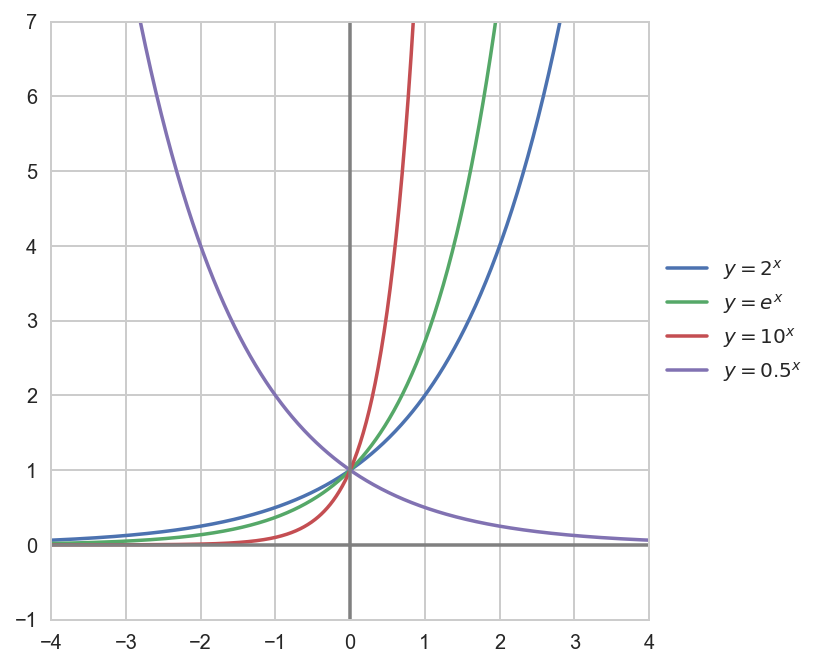

In [26]:
x = np.linspace(-5, 5, 1000)
y1 = 2**x
y2 = np.e**x
y3 = 10**x
y4 = (1/2)**x

fig, ax = plt.subplots()
ax.plot(x, y1, label='$y=2^x$')
ax.plot(x, y2, label='$y=e^x$')
ax.plot(x, y3, label='$y=10^x$')
ax.plot(x, y4, label='$y=0.5^x$')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-4, 4)
ax.set_ylim(-1, 7)
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Logarithm functions
[Logarithm](https://en.wikipedia.org/wiki/Logarithm) is the inverse function of exponentiation. With a given base $b\;(b>0)$, logarithm functions have the following form:

$$y=\log_b{x}$$

The domain of the logarithm functions is $x\in(0,+\infty)$. Popular logarithm functions are:
- $f(x)=\log_2{x}$, the [binary logarithm](https://en.wikipedia.org/wiki/Binary_logarithm)
- $f(x)=\log_{10}{x}=\lg{x}$, the [common logarithm](https://en.wikipedia.org/wiki/Common_logarithm)
- $f(x)=\log_e{x}=\ln{x}=\log{x}$, the [natural logarithm](https://en.wikipedia.org/wiki/Natural_logarithm)

Notice that in many Python libraries, the `log` function refers to the natural logarithm instead of base 10.

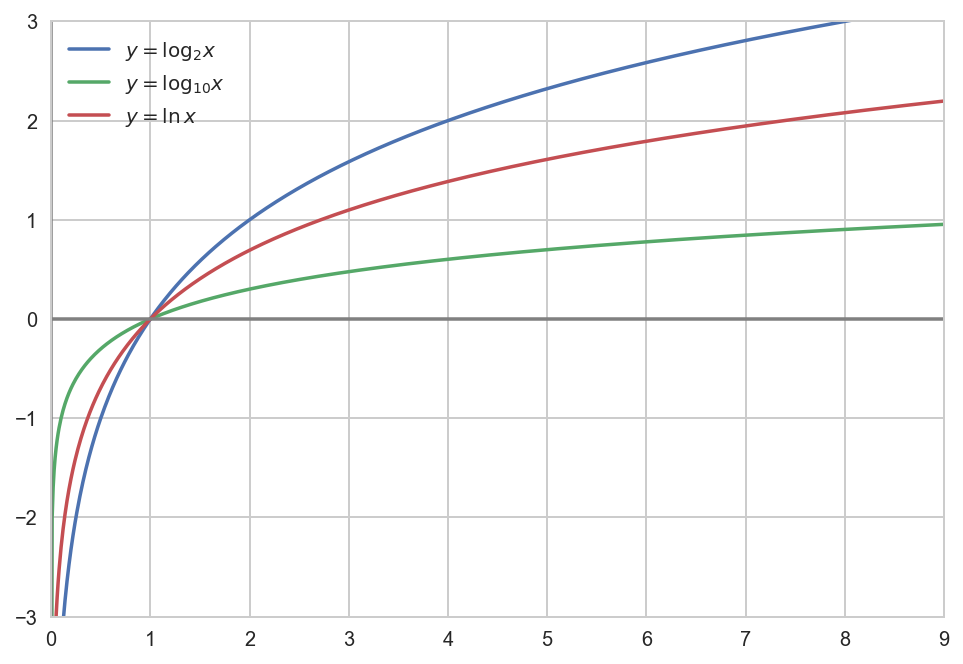

In [27]:
x = np.linspace(1e-6, 10, 1000)
y1 = np.log2(x)
y2 = np.log10(x)
y3 = np.log(x)

fig, ax = plt.subplots()
ax.plot(x, y1, label='$y=\log_2{x}$')
ax.plot(x, y2, label='$y=\log_{10}{x}$')
ax.plot(x, y3, label='$y=\ln{x}$')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(0, 9)
ax.set_ylim(-3, 3)
ax.legend()
plt.show()

### Power functions
[Power functions](https://en.wikipedia.org/wiki/Exponentiation#Power_functions) are a family of functions having $x$ in their bases, they should not be confused with exponential functions. The most common type of power function being applied in Data Science is the ones with a natural exponent:

$$y=x^n$$

where $n\;(n\in\mathbb{N})$ is the exponent.

The domain of power functions is $x\in\mathbb{R}$. If $n$ is even, the function is [reflectional symmetric](https://en.wikipedia.org/wiki/Reflection_symmetry) since $f(x)=f(-x)$; if $n$ is odd, the function is [rotationally symmetric](https://en.wikipedia.org/wiki/Rotational_symmetry) since $f(x)=-f(-x)$. Some popular named functions of this type are:
- $f(x)=x^2$, the [square function](https://en.wikipedia.org/wiki/Square_(algebra)), applied in calculating the area
- $f(x)=x^3$, the [cube function](https://en.wikipedia.org/wiki/Cube_(algebra)), applied in calculating the volume

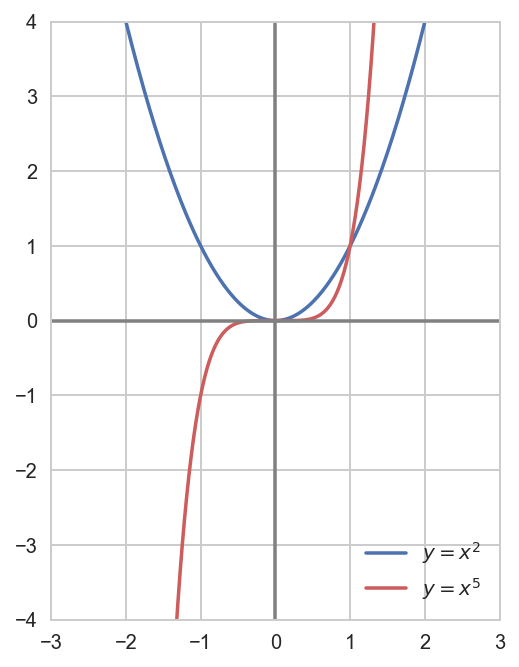

In [28]:
x = np.linspace(-5, 5, 1000)
y1 = x**2
y2 = x**5

fig, ax = plt.subplots()
ax.plot(x, y1, label='$y=x^2$')
ax.plot(x, y2, label='$y=x^5$', c='indianred')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-3, 3)
ax.set_ylim(-4, 4)
ax.legend()
plt.show()

### Root functions
Root functions are power functions having rational exponents:

$$y=x^{a/b}=\sqrt[b]{x^a}\;(a,b\in\mathbb{N})$$

The domain of root functions is $x\geq0$ for even values of $b$ and is $x\in\mathbb{R}$ for odd values of $b$. Some popular root functions are:
- $f(x)=\sqrt{x}$, the *square root* function
- $f(x)=\sqrt[3]{x}$, the *cube root* function

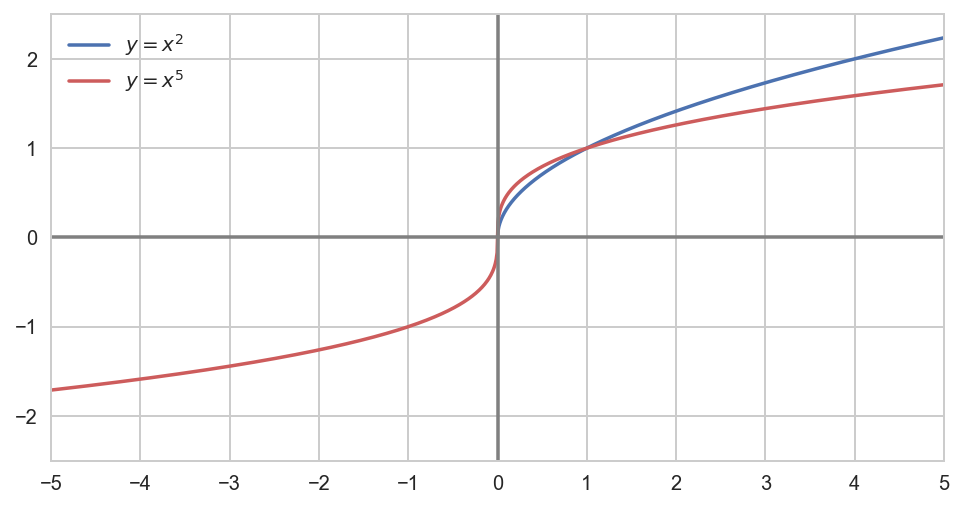

In [29]:
x1 = np.linspace(0, 5, 1000)
y1 = np.sqrt(x1)
x2 = np.linspace(-5, 5, 1000)
y2 = np.cbrt(x2)

fig, ax = plt.subplots()
ax.plot(x1, y1, label='$y=x^2$')
ax.plot(x2, y2, label='$y=x^5$', c='indianred')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-5, 5)
ax.set_ylim(-2.5, 2.5)
ax.legend()
plt.show()

### Reciprocal functions
Reciprocal function is a special case of power function, when the exponent is a negative rational number:

$$y=x^{-q}=\frac{1}{x^q}\;(q\in\mathbb{Q})$$

The domain of reciprocal functions is $x\neq0$. They also have symmetric properties like natural power functions. The term *reciprocal* usually refers to the most common case, $f(x)=x^{-1}$, which has a beautiful property: $x\cdot x^{-1}=1$.

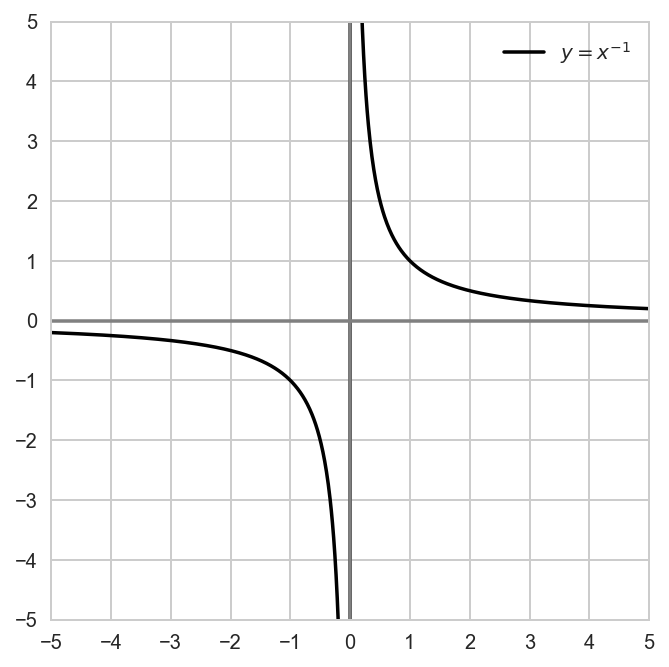

In [30]:
x = np.linspace(-5, 5, 1000)
y = 1/x

fig, ax = plt.subplots()
ax.plot(x, y, 'k', label='$y=x^{-1}$')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend()
plt.show()

### Trigonometric functions
Three most used [trigonometric functions](https://en.wikipedia.org/wiki/Trigonometric_functions) in modern Mathematics are the sine ($y=\sin{x}$), the cosine ($y=\cos{x}$) and the tangent ($y=\tan{x}$). They are defined on the [unit circle](https://en.wikipedia.org/wiki/Unit_circle) $x^2+y^2=1$. Since all trigonometric functions are periodic, the visualization for them is limited to be in the domain $x\in(-2\pi,2\pi)$.

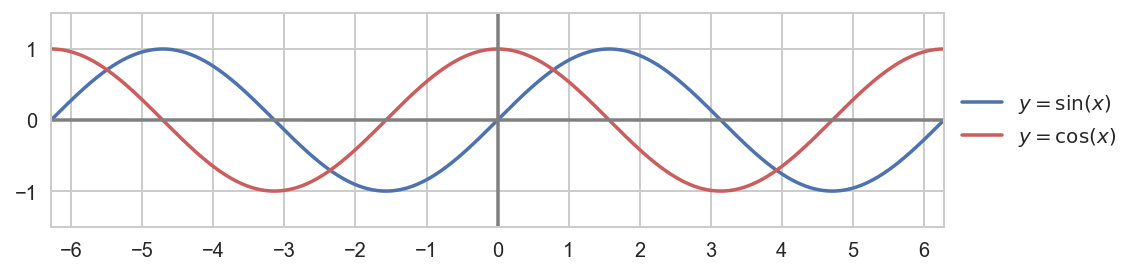

In [31]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y1, label='$y=\sin(x)$')
ax.plot(x, y2, label='$y=\cos(x)$', c='indianred')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Hyperbolic functions
[Hyperbolic functions](https://en.wikipedia.org/wiki/Hyperbolic_functions) are trigonometric functions defined using the [unit hyperbola](https://en.wikipedia.org/wiki/Unit_hyperbola) $x^2-y^2=1$ rather than the circle. The formulas for the three most popular hyperbolic functions are:
- $\displaystyle{\sinh{x}=\frac{e^x-e^{-x}}{2}}$

- $\displaystyle{\cosh{x}=\frac{e^x+e^{-x}}{2}}$

- $\displaystyle{\tanh{x}=\frac{\sinh{x}}{\cosh{x}}=\frac{e^x-e^{-x}}{e^x+e^{-x}}}$

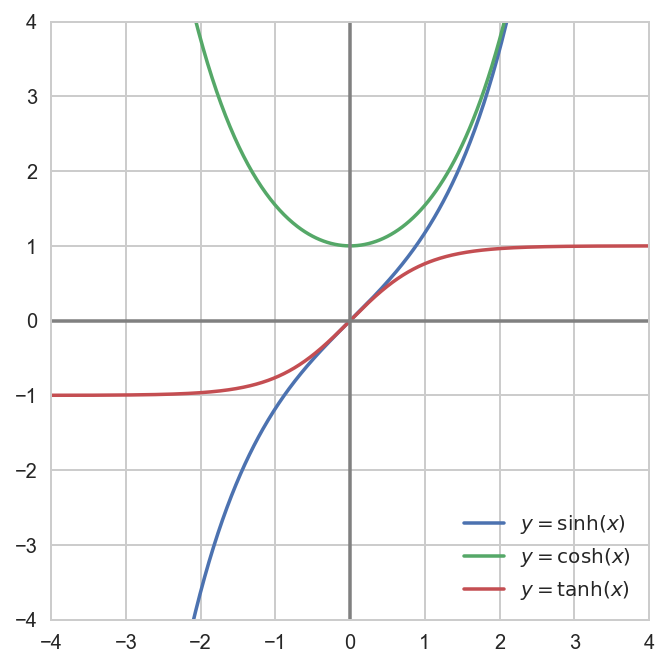

In [32]:
x = np.linspace(-5, 5, 1000)
y1 = np.sinh(x)
y2 = np.cosh(x)
y3 = np.tanh(x)

fig, ax = plt.subplots()
ax.plot(x, y1, label='$y=\sinh(x)$')
ax.plot(x, y2, label='$y=\cosh(x)$')
ax.plot(x, y3, label='$y=\\tanh(x)$')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend()
plt.show()

## 2.2. Function transformations

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid']) 
%config InlineBackend.figure_format = 'retina'

### Translation
[Translation](https://en.wikipedia.org/wiki/Translation_(geometry)) refers to the process of shifting the entire graph to another position. Given a constant $c\;(c>0)$, the formulas below show how $c$ moves the graph of $f(x)$:
- $f(x)+c$ shifts the graph $c$ units up
- $f(x)-c$ shifts the graph $c$ units down
- $f(x+c)$ shifts the graph $c$ units to the left
- $f(x-c)$ shifts the graph $c$ units to the right

The whole process can also be represented using a matrix multiplication:

$$
\begin{bmatrix}\begin{array}{r}1 & 0 & c1 \\ 0 & 1 & c2 \\ 0 & 0 & 1\end{array}\end{bmatrix} \cdot
\begin{bmatrix}x \\ y \\ 1\end{bmatrix} =
\begin{bmatrix}x+c_1 \\ y+c_2 \\ 1\end{bmatrix}
$$

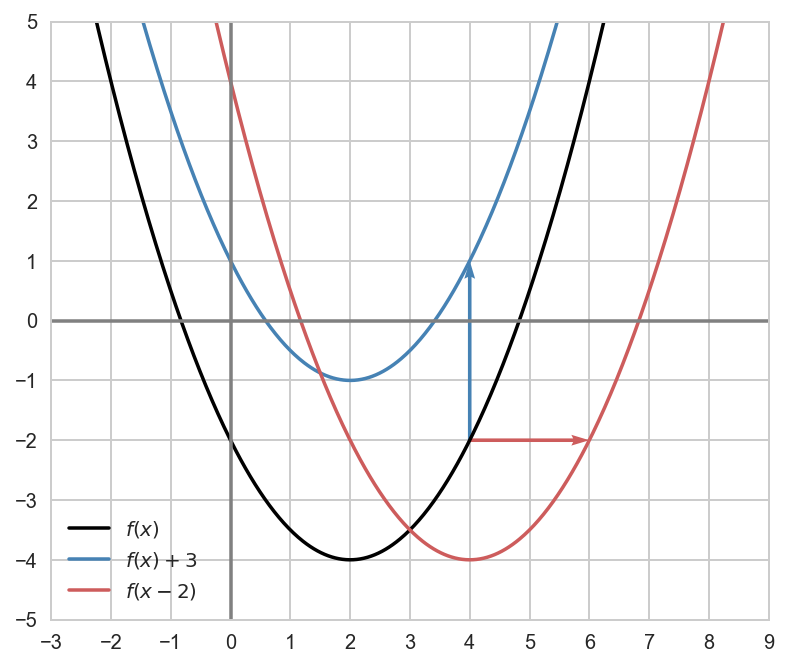

In [34]:
def f(x):
    y = x**2/2 - 2*x - 2
    return y

x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$', c='black')
ax.plot(x, f(x)+3, label='$f(x)+3$', c='steelblue')
ax.plot(x, f(x-2), label='$f(x-2)$', c='indianred')
ax.quiver(
    [ 4,  4],
    [-2, -2],
    [ 0,  2],
    [ 3,  0],
    color=['steelblue', 'indianred'],
    scale_units='xy', angles='uv',
    scale=1, width=0.005,
)
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-3, 9)
ax.set_ylim(-5, 5)
ax.legend()
plt.show()

### Dilation
Dilation refers to the process of compressing/stretching the graph. Given a constant $c\;(c>1)$, the formulas below show how $c$ resizes the graph of $f(x)$:
- $c\cdot f(x)$ stretches the graph $c$ times vertically (in the $y$-direction)
- $\displaystyle{\frac{1}{c}\cdot f(x)}$ compresses the graph $c$ times vertically (in the $y$-direction)
- $f(cx)$ compress the graph $c$ times horizontally (in the $x$-direction)
- $\displaystyle{f\left(\frac{x}{c}\right)}$ stretches the graph $c$ times horizontally (in the $x$-direction)

Note that resizing to a similar shape requires compressing/stretching the same times on both axes. This can be written in matrix form:

$$
\begin{bmatrix}c&0 \\ 0&c\end{bmatrix}
\cdot
\begin{bmatrix}x \\ y\end{bmatrix} =
\begin{bmatrix}cx \\ cy\end{bmatrix}
$$

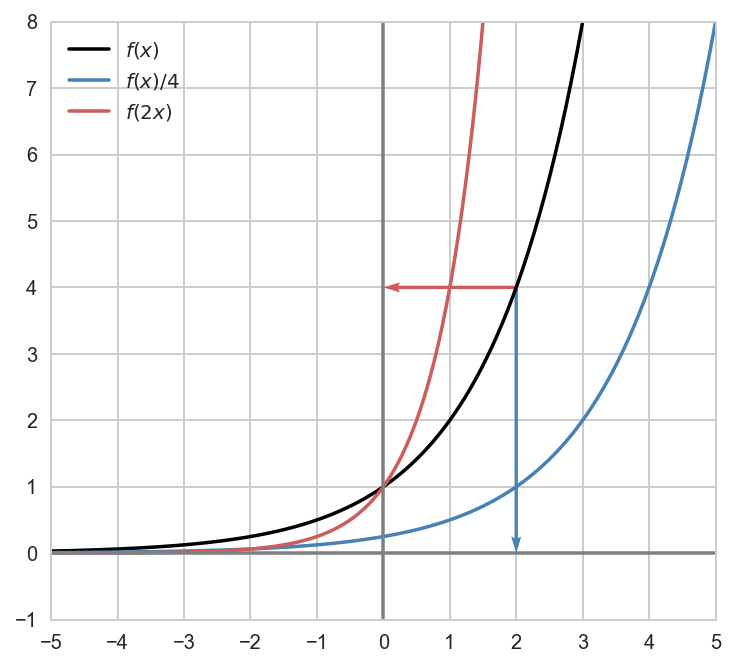

In [35]:
def f(x):
    y = 2**x
    return y

x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$', c='black')
ax.plot(x, f(x)/4, label='$f(x)/4$', c='steelblue')
ax.plot(x, f(x*2), label='$f(2x)$', c='indianred')
ax.quiver(
    [ 2,  2],
    [ 4,  4],
    [ 0, -2],
    [-4,  0],
    color=['steelblue', 'indianred'],
    scale_units='xy', angles='uv',
    scale=1, width=0.005,
)
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-5, 5)
ax.set_ylim(-1, 8)
ax.legend()
plt.show()

### Reflection
[Reflection](https://en.wikipedia.org/wiki/Reflection_(mathematics)) considers a line as the *axis of reflection* to map the graph to its image. Here are reflection formulas:
- $f(-x)$ results in the graph being reflected across the $y$-axis
- $f-(x)$ results in the graph being reflected across the $x$-axis

The refelection process can also be written as the dot product of a square matrix with the vector $\begin{bmatrix}x\\y\end{bmatrix}$, where each matrix uses a different axis of reflection. For example, $\begin{bmatrix}\begin{array}{r}1&0 \\ 0&-1\end{array}\end{bmatrix}$ for a reflection over $x$-axis, $\begin{bmatrix}\begin{array}{r}-1&0 \\ 0&1\end{array}\end{bmatrix}$ for a reflection over $y$-axis and $\begin{bmatrix}0&1 \\ 1&0\end{bmatrix}$ for a reflection over the line $y=x$.

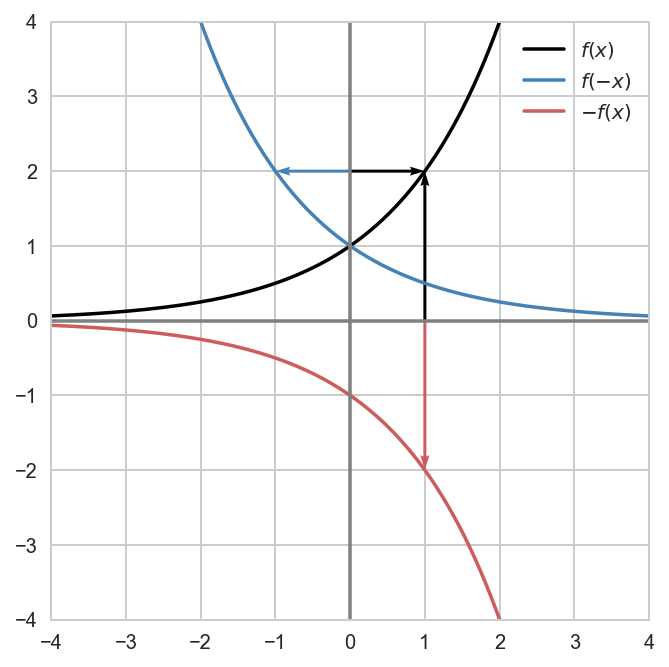

In [36]:
def f(x):
    y = 2**x
    return y

x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$', c='black')
ax.plot(x, f(-x), label='$f(-x)$', c='steelblue')
ax.plot(x, -f(x), label='$-f(x)$', c='indianred')
ax.quiver(
    [ 0,  0,  1,  1],
    [ 2,  2,  0,  0],
    [ 1, -1,  0,  0],
    [ 0,  0,  2, -2],
    color=['black', 'steelblue', 'black', 'indianred'],
    scale_units='xy', angles='uv',
    scale=1, width=0.005,
)
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend()
plt.show()

### Rotation
Graph [rotation](https://en.wikipedia.org/wiki/Rotation) actually means rotating points on the graph one by one. The rotated graph is no longer a function and cannot be represented in the form $y=f(x)$. The formula below shows how to rotate a point about the origin, counterclockwise and by an angle of $\theta$:

$$\begin{aligned}
x'=x\cos\theta-y\sin\theta \\
y'=x\sin\theta+y\cos\theta
\end{aligned}$$

This beautiful formula can also be written using matrix notation as:

$$
\begin{bmatrix}x' \\ y'\end{bmatrix}=
\begin{bmatrix}\begin{array}{r}\cos\theta &-\sin\theta \\ \sin\theta &\cos\theta \end{array}\end{bmatrix}
\begin{bmatrix}x \\ y\end{bmatrix}
$$

or using [complex numbers](https://en.wikipedia.org/wiki/Complex_number):

$$\begin{aligned}
x'+iy'
&= (x\cos\theta-y\sin\theta)+i(x\sin\theta+y\cos\theta) \\
&= (\cos\theta+i\sin\theta)(x+iy) \\
&= e^{i\theta}(x+iy)
\end{aligned}$$

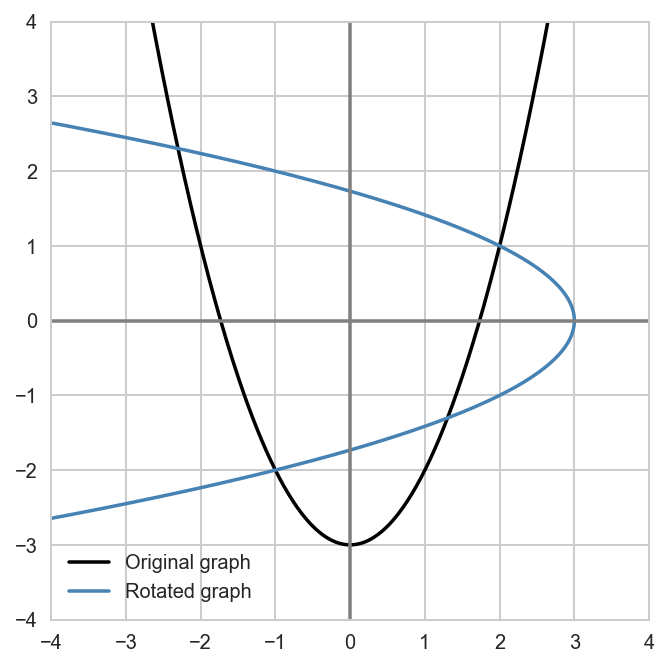

In [37]:
def rotate(x, y, theta):
    x_rotated = x*np.cos(theta) - y*np.sin(theta)
    y_rotated = x*np.sin(theta) + y*np.cos(theta)
    return x_rotated, y_rotated

x = np.linspace(-10, 10, 1000)
y = x**2 - 3
theta = np.pi/2

x_rotated, y_rotated = rotate(x, y, theta)

fig, ax = plt.subplots()
ax.plot(x, y, label='Original graph', c='black')
ax.plot(x_rotated, y_rotated, label='Rotated graph', c='steelblue')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend()
plt.show()

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*